# Face Detection with a Multi-Task Cascaded Convolutional Neural Network (MT-CNN)

Face detection is a 'non-trivial problem'.

Here we apply a method called Multi-Task Cascaded Convolutional Neural Network (MT-CNN), using an implementation that uses tensorflow.

If you are not using the enviroment provided with this project the following need to be installed:

* matplotlib (conda or pip install)
* mtcnn (pip install)
* tensorflow (conda or pip install)

### Cascaded Convolutional Neural Network method

State-of-the art results are achieved using a 'cascaded convultional neural network', which has pre-processing followed by three phases:

1. Pre-processing - create images of varying scale
1. Produce candidate windows using a shallow CNN (Proposal network, P-Net). Merge highly overlapping boxes.
1. Filter out and refine windows using a more complex CNN (Refinement network, R-Net). Merge highly overlapping boxes.
1. Use more complex CNN to refine and add facial features (Output network, O-Net). Adds points for eyes, end of nose, and edges of mouth.

![](images/cascade.png)


### Cascaded Convolutional Neural Architecture

The achictecture is shown below.

![](images/architecture.png)

### Implementation

Multi-task Cascaded Convolutional Neural Networks for Face Detection, based on TensorFlow

https://pypi.org/project/mtcnn/

### References

Zhang, K., Zhang, Z., Li, Z., and Qiao, Y. (2016). Joint face detection and alignment using multitask cascaded convolutional networks. IEEE Signal Processing Letters, 23(10):1499–1503. https://ieeexplore.ieee.org/document/7553523

Kaipeng Zhang, Zhanpeng Zhang, Zhifeng Li, Yu Qiao (2016) Joint Face Detection and Alignment using Multi-task Cascaded Convolutional Networks. arXiv:1604.0287 https://arxiv.org/abs/1604.02878

https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

## Example 1

![](./images/test_1.jpg)

### Getting box boundaries and feature points

Output is a list of dictionaries for boundary of face and location of key facial features.

In [2]:
# face detection with mtcnn on a photograph

# load image from file
filename = 'images/test_1.jpg'
pixels = plt.imread(filename)

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print('\n')
    print(face)



{'box': [186, 71, 87, 115], 'confidence': 0.9994562268257141, 'keypoints': {'left_eye': (207, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (244, 159)}}


{'box': [368, 75, 108, 138], 'confidence': 0.998593270778656, 'keypoints': {'left_eye': (392, 133), 'right_eye': (441, 140), 'nose': (407, 170), 'mouth_left': (388, 180), 'mouth_right': (438, 185)}}


## Using box boundaries to highlight faces using MatPlotLib

We will use the output (list of dictionaries) to draw rectangles outlining faces over the photo.

In [3]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.show()

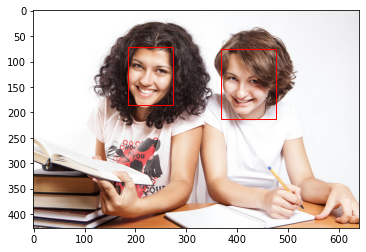

In [4]:
filename = 'images/test_1.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

## Example 2 - a more challenging example

![](./images/test_2.jpg)

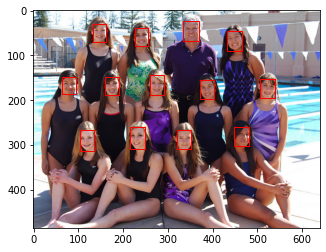

In [5]:
filename = 'images/test_2.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
draw_image_with_boxes(filename, faces)

### Adding feature points to the matplotlib output

Eyes, end of nose, and ends of mouth will be highlighted (again using the dictionary output from mtcnn).

In [6]:
# draw an image with detected objects
def draw_image_with_boxes_and_features(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    # show the plot
    plt.show()

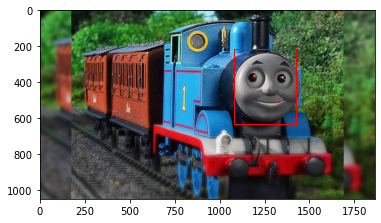

In [7]:
filename = './images/thomas.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes_and_features(filename, faces)

## Extract faces as separate figures

Let's extract and pront faces from the following picture example.

![](./images/test_3.jpg)

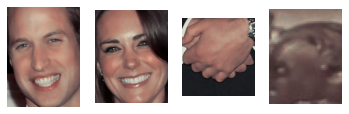

In [8]:
# draw each face separately
def draw_faces(filename, result_list):
    # load plt image
    data = plt.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        plt.subplot(1, len(result_list), i+1)
        plt.axis('off')
        # plot face
        plt.imshow(data[y1:y2, x1:x2])
    # show the plot
    plt.show()

filename = './images/test_3.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)

Hmmm. We seem to have some non-faces!

(Though I did find that these disappeared if I reduced the size of the original picture to 50% of original height and width).

Let's look at confidence values.

In [9]:
# load image from file
filename = './images/test_3.jpg'
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
for face in faces:
    print(face)

{'box': [583, 62, 151, 208], 'confidence': 0.9997166991233826, 'keypoints': {'left_eye': (614, 144), 'right_eye': (681, 133), 'nose': (647, 187), 'mouth_left': (629, 214), 'mouth_right': (695, 204)}}
{'box': [210, 158, 143, 184], 'confidence': 0.990142285823822, 'keypoints': {'left_eye': (246, 235), 'right_eye': (308, 226), 'nose': (278, 265), 'mouth_left': (254, 294), 'mouth_right': (321, 282)}}
{'box': [626, 773, 146, 156], 'confidence': 0.9861887097358704, 'keypoints': {'left_eye': (690, 835), 'right_eye': (718, 834), 'nose': (700, 879), 'mouth_left': (683, 884), 'mouth_right': (708, 885)}}
{'box': [206, 45, 45, 59], 'confidence': 0.8218274116516113, 'keypoints': {'left_eye': (226, 65), 'right_eye': (235, 62), 'nose': (232, 72), 'mouth_left': (228, 87), 'mouth_right': (235, 85)}}


### Set required confidence level and save face extracts

We'll set a higher confidence level to show faces (we could also change colour of box dependening on confidence level), and also sace the extracted faces as separate jpg files.

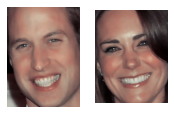

In [10]:
confidence_cutoff = 0.99

# draw each face separately
def draw_faces(filename, result_list):
    counter = 1
    # load the image
    data = plt.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        if result_list[i]['confidence'] >= confidence_cutoff:
            # get coordinates
            x1, y1, width, height = result_list[i]['box']
            x2, y2 = x1 + width, y1 + height
            # define subplot
            plt.subplot(1, len(result_list), i+1)
            plt.axis('off')
            # plot face
            face_extract = data[y1:y2, x1:x2]
            plt.imshow(face_extract)   
            plt.savefig(f'./saved_images/face_extract_{counter}.jpg')
            counter += 1
    # show the plot
    plt.show()

filename = './images/test_3.jpg'
# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)